# Airbus Ship Detection Data Visualization

**Dataset** from [**GitHub**](https://www.kaggle.com/competitions/airbus-ship-detection)

In [3]:
import sys
print(sys.version)

3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:01:00) 
[GCC 7.3.0]


In [4]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import imutils
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'numpy'

In [2]:
TRAIN_IMAGES_PATH = 'dataset/train_v2/'
TEST_IMAGES_PATH = 'dataset/test_v2/'
TRAIN_IMAGES_SEGMENTATIONS_PATH = 'dataset/train_ship_segmentations_v2.csv'

In [3]:
df = pd.read_csv(TRAIN_IMAGES_SEGMENTATIONS_PATH)
df['ship_count'] = df.groupby('ImageId')['ImageId'].transform('count')
df.loc[df['EncodedPixels'].isnull().values, 'ship_count'] = 0

Plot images

In [4]:
def load_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def rle_to_pixels(rle_code):
    '''
    Transforms a RLE code string into a list of pixels of a (768, 768) canvas
    '''
    rle_code = [int(i) for i in rle_code.split()]
    pixels = [(pixel_position % 768, pixel_position // 768)
                  for start, length in list(zip(rle_code[0:-1:2], rle_code[1::2]))
                  for pixel_position in range(start, start + length)]
    return pixels

def create_mask(pixels):
    image = np.zeros((768, 768, 1))
    for x, y in pixels:
        image[x, y] = 255
    return image

In [5]:
images = pd.DataFrame()
df_grouped = df.dropna()
df_grouped = df_grouped.groupby('ImageId')[['EncodedPixels']].agg(lambda rle_codes: ' '.join(rle_codes)).reset_index()
sample = random.sample(df_grouped['ImageId'].tolist(), 6)
images['id'] = sample
images['path'] = [TRAIN_IMAGES_PATH + i for i in sample]
images['mask_pixels'] = [df_grouped.loc[df_grouped['ImageId'] == i, 'EncodedPixels'].values[0] for i in sample]
images['ship_count'] = [df.loc[df['ImageId'] == i, 'ship_count'].values[0] for i in sample]

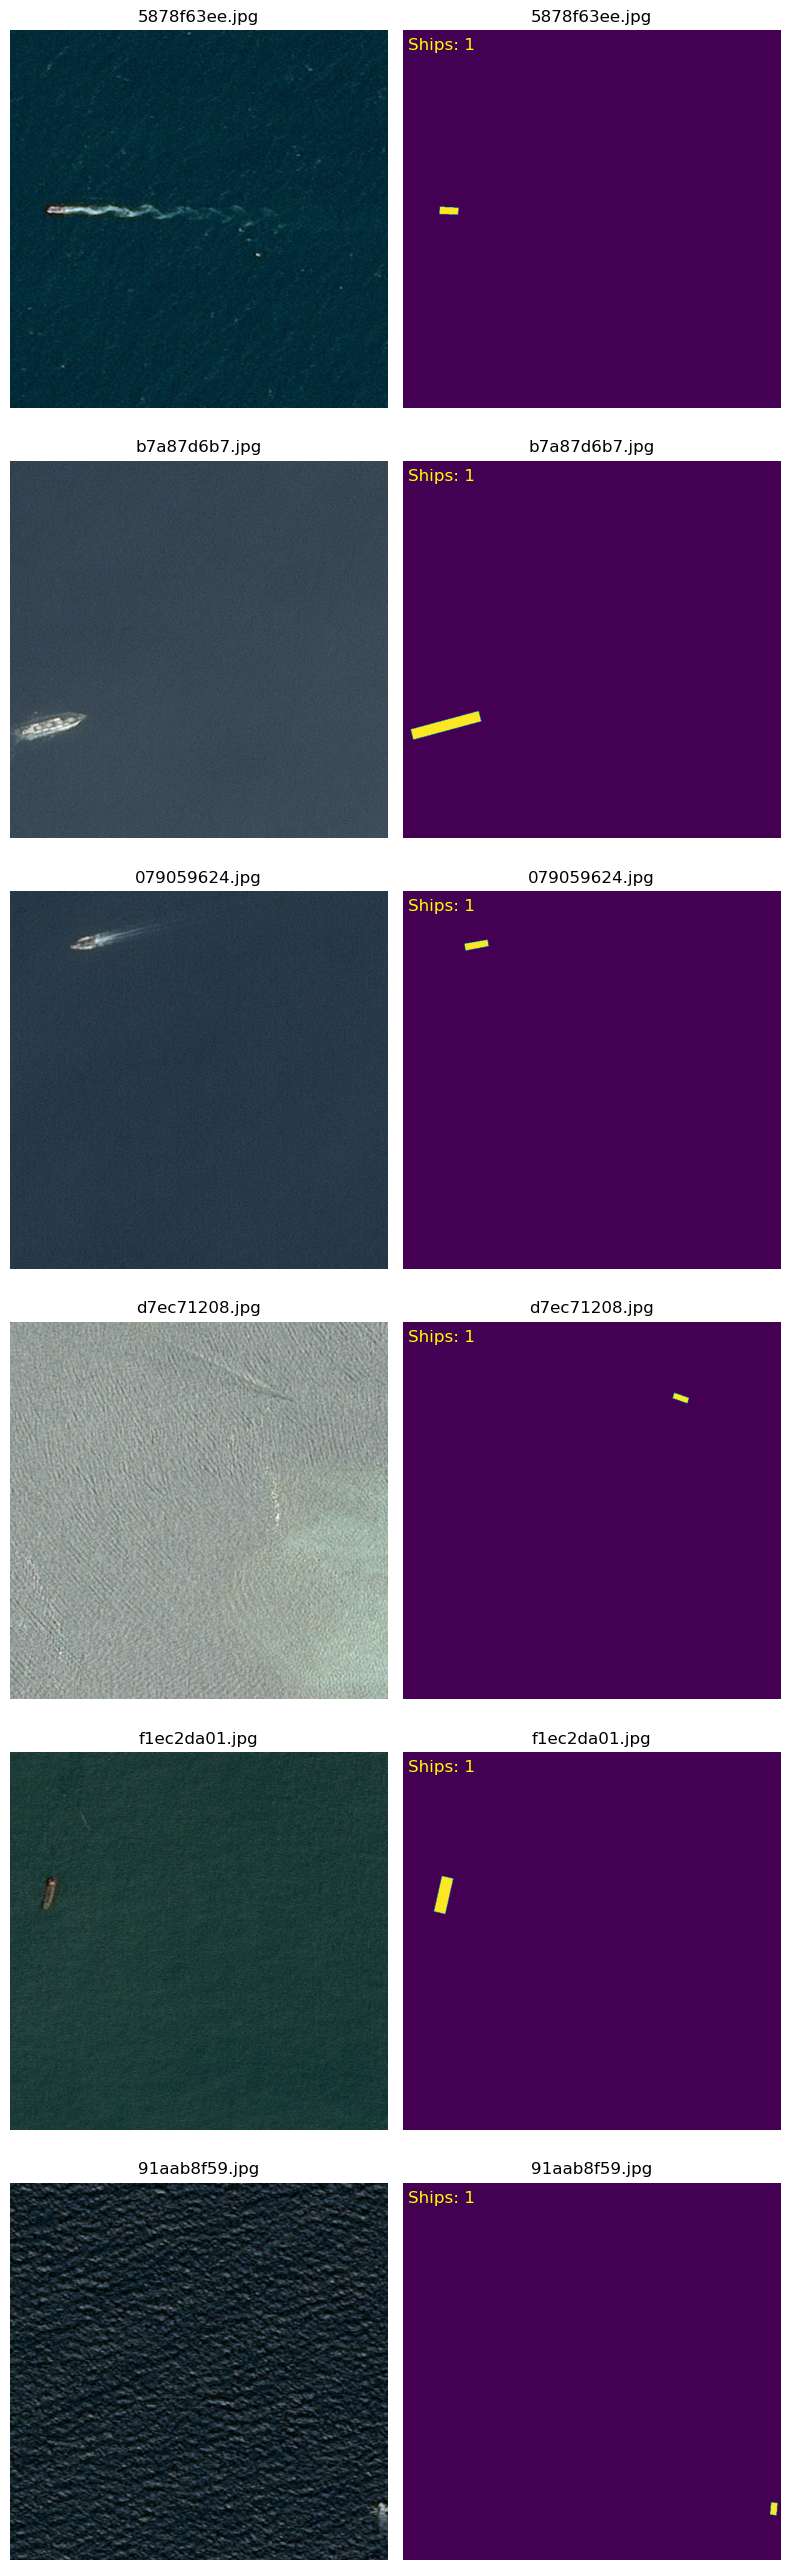

In [6]:
plt.figure(figsize=(8, 26))

for i in range(len(images)):
    plt.subplot(6, 2, 2*i+1)
    plt.axis('off')
    image = load_image(images['path'][i])
    plt.imshow(image)
    plt.title(images['id'][i])
    
    plt.subplot(6, 2, 2*i+2)
    plt.axis('off')
    mask_pixels = rle_to_pixels(images['mask_pixels'][i])
    image = create_mask(mask_pixels)
    plt.imshow(image)
    plt.title(images['id'][i])
    plt.text(10, 40, f"Ships: {images['ship_count'][i]}", color='yellow', fontsize=12)
    
plt.tight_layout()
plt.show()

Plot ship count

In [7]:
df['ship_count'].describe()

count    231723.000000
mean          1.344472
std           2.755929
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          15.000000
Name: ship_count, dtype: float64

<AxesSubplot:xlabel='ship_count'>

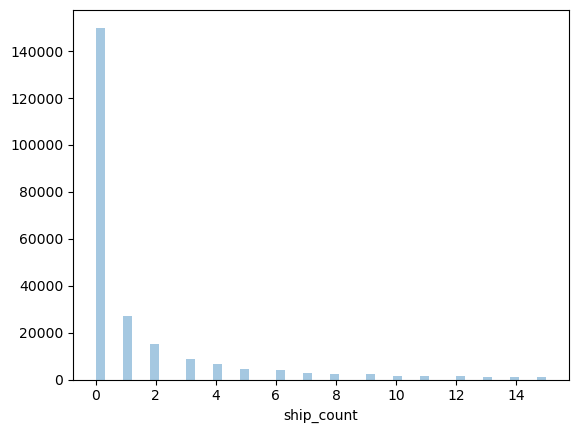

In [8]:
sns.distplot(df['ship_count'], kde=False)